## Divide and Conquer
- problem
    - divide into non-overlapping subporblems
    - sub problems that are of same type
    - solve each sub-problems
    - combine the result to solve the total problem
    - <b>recursive problem</b>

## Linera search recursion
- a list of elements need to find a given element

In [10]:
lst = [1, 2, 3, 4, 5, 7, 9, 21, 34]
low = 0
high = 9
key = 3

def LinearSearch(lst, low, high, key):
    if low >= high:
        return 'NOT_FOUND'
    elif lst[low] == key:
        return low
    return LinearSearch(lst, low+1, high, key)

LinearSearch(lst, low, high, key)

2

In [20]:
def BinarySearch(lst, low, high, key):
    
    # the key is not in the array
    # the location to insert the key
    if high < low:
        return f'NOT_FOUND: {low}'
    
    middle = low + (high-low)//2
    print(middle)
    
    if lst[middle] == key:
        return middle
    elif lst[middle] > key:
        return BinarySearch(lst, low, middle-1, key)
    else:
        return BinarySearch(lst, middle+1, high, key)

BinarySearch(lst, low, high, 1)
# time complexity: O(log(n))

4
1
0


0

## polinomial multiplication
- product of 3x<sup>2</sup>+2x+5 and 7x<sup>2</sup>+3x+2

In [27]:
## naive algorithm
a = (3, 2, 5)
b = (7, 3, 2)

def product(a, b):
    l = len(a)
    
    prod_array = [0 for _ in range(1, 2*l)]
    
    for i in range(l):
        for j in range(l):
            
            prod_array[i+j] = prod_array[i+j] + a[i]*b[j]
    return prod_array

product(a, b)

[21, 23, 47, 19, 10]

## naive divide and conquer algorithm

- let divide the ploynomial into 2
    - upper half & the lower half
    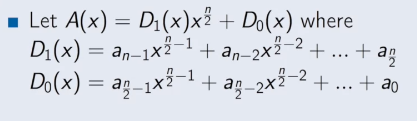
- simmilary break the polynomial 2
    - E1 and E0

- the product is 
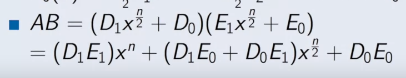
- now we can use recurssion
- runtime
    - T(n) = 4T(n/2) + kn
    - 4 because 4 subproblem in each (multiplication)

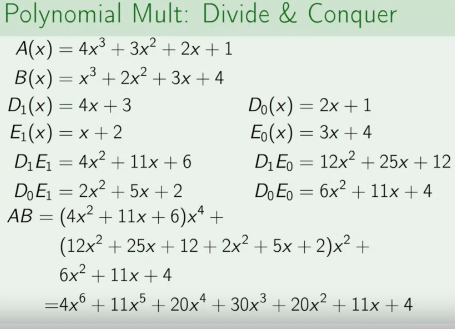

In [20]:
# naive divide and conquer for polynomial multiplication

def mult2(a, b):
    
    n = len(a)
    
    # base case
    # polynomilas of degree 0 or 1
    if n == 1:
        return [a[0]*b[0]]
    if n == 2:
        return [a[0]*b[0], a[0]*b[1]+a[1]*b[0], a[1]*b[1]]
    
    # else
    # split the polynomials
    half_n = n//2
    a_low, a_high = a[:half_n], a[half_n:]
    b_low, b_high = b[:half_n], b[half_n:]
    
    z0 = mult2(a_low, b_low)
    z1 = mult2(a_high, b_high)
    
    # middle term
    d1e0 = mult2(a_low, b_high)
    d0e1 = mult2(a_high, b_low)
    middle = [i+j for i, j in zip(d1e0, d0e1)]
    
    # combine the results with appropriate scaling
    result = [i+j+k for i, j, k in zip(
        z0+[0]*n, [0]*half_n+middle+[0]*half_n, [0]*n+z1)]
#     print(z0)
#     print(middle)
#     print(z1)
#     print('---------------')
    return result
    
    

A  = [4, 3, 2, 1]
B = [1, 2, 3, 4]

mult2(A, B)
    

[4, 11, 6]
[14, 30, 14]
[6, 11, 4]
---------------


[4, 11, 20, 30, 20, 11, 4]

## runtime calculation
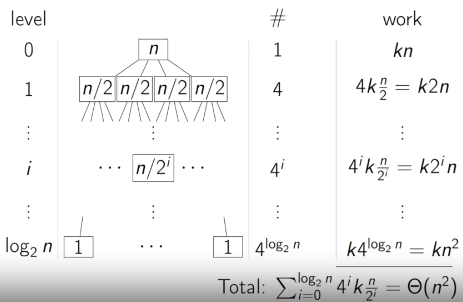

In [ ]:
def mult_karatsuba(a, b):
    
    n = len(a)
    
    # base case
    # polynomilas of degree 0 or 1
    if n == 1:
        return [a[0]*b[0]]
    if n == 2:
        return [a[0]*b[0], a[0]*b[1]+a[1]*b[0], a[1]*b[1]]
    
    # else
    # split the polynomials
    half_n = n//2
    a_low, a_high = a[:half_n], a[half_n:]
    b_low, b_high = b[:half_n], b[half_n:]
    
    z0 = mult2(a_low, b_low)
    z1 = mult2(a_high, b_high)
    
    # middle term
    d1e0 = mult2(a_low, b_high)
    d0e1 = mult2(a_high, b_low)
    middle = [i+j for i, j in zip(d1e0, d0e1)]
    
    # combine the results with appropriate scaling
    result = [i+j+k for i, j, k in zip(
        z0+[0]*n, [0]*half_n+middle+[0]*half_n, [0]*n+z1)]
    
    return result